In [6]:
import sys
sys.path.append('../src')

import torch
from imgaug import augmenters as iaa
from transformers import OneFormerProcessor, OneFormerForUniversalSegmentation
from transformers.models.oneformer.image_processing_oneformer import load_metadata, prepare_metadata
from config import DATASET_DIR, CLASS_INFO_PATH, MAIN_PROJECT_DIR
from visual import *
from dataset import *

In [7]:
model = OneFormerForUniversalSegmentation.from_pretrained("shi-labs/oneformer_coco_dinat_large", is_training=True)
processor = OneFormerProcessor.from_pretrained("shi-labs/oneformer_coco_dinat_large")
processor.image_processor.num_text = model.config.num_queries - model.config.text_encoder_n_ctx

Some weights of OneFormerForUniversalSegmentation were not initialized from the model checkpoint at shi-labs/oneformer_coco_dinat_large and are newly initialized: ['model.text_mapper.prompt_ctx.weight', 'model.text_mapper.text_encoder.ln_final.bias', 'model.text_mapper.text_encoder.ln_final.weight', 'model.text_mapper.text_encoder.positional_embedding', 'model.text_mapper.text_encoder.token_embedding.weight', 'model.text_mapper.text_encoder.transformer.layers.0.layer_norm1.bias', 'model.text_mapper.text_encoder.transformer.layers.0.layer_norm1.weight', 'model.text_mapper.text_encoder.transformer.layers.0.layer_norm2.bias', 'model.text_mapper.text_encoder.transformer.layers.0.layer_norm2.weight', 'model.text_mapper.text_encoder.transformer.layers.0.mlp.fc1.bias', 'model.text_mapper.text_encoder.transformer.layers.0.mlp.fc1.weight', 'model.text_mapper.text_encoder.transformer.layers.0.mlp.fc2.bias', 'model.text_mapper.text_encoder.transformer.layers.0.mlp.fc2.weight', 'model.text_mapper.

In [8]:
# Metadata must be set according to the dataset through the class_info.json file. Background class must be specified as well. 
processor.image_processor.repo_path = MAIN_PROJECT_DIR
processor.image_processor.class_info_file = os.path.join(MAIN_PROJECT_DIR, CLASS_INFO_PATH)
processor.image_processor.metadata = prepare_metadata(load_metadata(MAIN_PROJECT_DIR, os.path.join(MAIN_PROJECT_DIR, CLASS_INFO_PATH)))

In [9]:
dataset_train = GalaxyDataset(DATASET_DIR, "train", processor, CLASS_INFO_PATH)

In [10]:
dataset_val = GalaxyDataset(DATASET_DIR, "val", processor, CLASS_INFO_PATH)

In [11]:
dataset_test = GalaxyDataset(DATASET_DIR, "test", processor, CLASS_INFO_PATH)

In [31]:
dataset_test.load_mask(dataset_test.image_info[10])
dataset_test.class_mapping

{'0': 'background',
 '1': 'elliptical',
 '2': 'spiral',
 '3': 'spiral barred',
 '4': 'spiral edge-on',
 '5': 'artifact'}

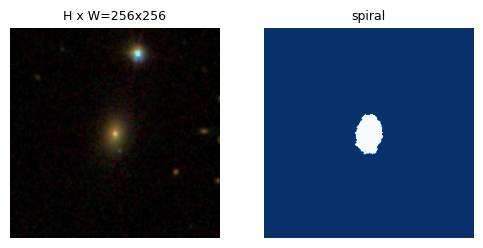

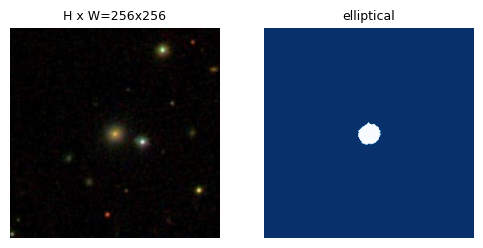

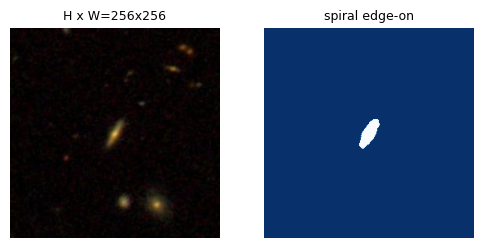

In [37]:
display_n_samples(dataset_test, 3)